**genetic**

Generation 1, Best fitness: 163.3698645180507
Generation 2, Best fitness: 163.3698645180507
Generation 3, Best fitness: 163.3698645180507
Generation 4, Best fitness: 163.3698645180507
Generation 5, Best fitness: 163.3698645180507
Generation 6, Best fitness: 163.3698645180507
Generation 7, Best fitness: 163.3698645180507
Generation 8, Best fitness: 163.3698645180507
Generation 9, Best fitness: 163.3698645180507
Generation 10, Best fitness: 163.3698645180507
Generation 11, Best fitness: 163.3698645180507
Generation 12, Best fitness: 163.3698645180507
Generation 13, Best fitness: 163.3698645180507
Generation 14, Best fitness: 163.3698645180507
Generation 15, Best fitness: 163.3698645180507
Generation 16, Best fitness: 163.3698645180507
Generation 17, Best fitness: 163.3698645180507
Generation 18, Best fitness: 163.3698645180507
Generation 19, Best fitness: 162.71709649683788
Generation 20, Best fitness: 162.71709649683788
Generation 21, Best fitness: 162.71709649683788
Generation 22, Best

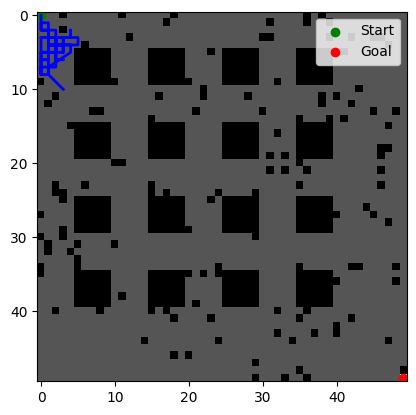

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Grid
grid_size = 50  # Adjust grid size to 50x50
grid = np.zeros((grid_size, grid_size))

# Buildings and obstacles
building_size = 5
for i in range(5, grid_size - 5, building_size + 5):
    for j in range(5, grid_size - 5, building_size + 5):
        grid[i:i+building_size, j:j+building_size] = 1

# Additional random obstacles
np.random.seed(0)
for _ in range(150):
    x, y = np.random.randint(0, grid_size, size=2)
    grid[x, y] = 1

# Start and goal positions
start = (0, 0)
goal = (grid_size - 1, grid_size - 1)
grid[start] = -1
grid[goal] = -2

# Visualization Function
def plot_grid(grid, path=None):
    plt.imshow(grid, cmap="gray_r")
    plt.scatter(*start[::-1], color="green", label="Start")
    plt.scatter(*goal[::-1], color="red", label="Goal")

    if path:
        path = np.array(path)
        plt.plot(path[:, 1], path[:, 0], color="blue", linewidth=2)

    plt.legend()
    plt.show()

#  Fitness function
def fitness(path, grid, goal):
    if not path:
        return float("inf")

    path_length = len(path)
    collisions = sum(1 for x, y in path if grid[x, y] == 1)  # collisions
    dist_to_goal = np.linalg.norm(np.array(path[-1]) - np.array(goal))  # Distance to goal
    return path_length + collisions * 100 + dist_to_goal  # Weighted fitness

# Generate a random path
def generate_random_path(start, goal, grid_size, max_steps=100):
    path = [start]
    for _ in range(max_steps):
        x, y = path[-1]
        neighbors = [
            (x + dx, y + dy)
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]
            if 0 <= x + dx < grid_size and 0 <= y + dy < grid_size
        ]
        if not neighbors:
            break
        path.append(random.choice(neighbors))
        if path[-1] == goal:
            break
    return path

# Crossover
def crossover(path1, path2):
    split_point = min(len(path1), len(path2)) // 2
    child1 = path1[:split_point] + path2[split_point:]
    child2 = path2[:split_point] + path1[split_point:]
    return child1, child2

# Mutation
def mutate(path, grid_size, mutation_rate=0.1):
    if random.random() < mutation_rate:
        idx = random.randint(0, len(path) - 1)
        x, y = path[idx]
        neighbors = [
            (x + dx, y + dy)
            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]
            if 0 <= x + dx < grid_size and 0 <= y + dy < grid_size
        ]
        if neighbors:
            path[idx] = random.choice(neighbors)

# Evolve the population
def evolve_population(population, grid, goal, grid_size, retain=0.2, mutate_rate=0.1):
    # Calculate fitness
    graded = [(fitness(path, grid, goal), path) for path in population]
    graded = sorted(graded, key=lambda x: x[0])
    retain_len = int(len(graded) * retain)

    # Select parents
    parents = [x[1] for x in graded[:retain_len]]

    # Add random individuals for diversity
    for _ in range(len(graded) - retain_len):
        if random.random() < 0.05:
            parents.append(random.choice([x[1] for x in graded]))

    # Generate children
    children = []
    while len(children) < len(population) - len(parents):
        p1, p2 = random.sample(parents, 2)
        child1, child2 = crossover(p1, p2)
        children.append(child1)
        children.append(child2)

    # Apply mutation
    for child in children:
        mutate(child, grid_size, mutate_rate)

    # New population
    population = parents + children[: len(population) - len(parents)]
    return population, graded[0]

# Initialize population
def initialize_population(start, goal, grid_size, population_size, max_steps):
    return [
        generate_random_path(start, goal, grid_size, max_steps)
        for _ in range(population_size)
    ]

# Main Genetic Algorithm function
def genetic_algorithm(grid, start, goal, grid_size, generations=100, population_size=50, max_steps=100):
    population = initialize_population(start, goal, grid_size, population_size, max_steps)
    best_path = None

    for generation in range(generations):
        population, best = evolve_population(population, grid, goal, grid_size)
        best_path = best[1]
        print(f"Generation {generation + 1}, Best fitness: {best[0]}")

        if best_path[-1] == goal:
            break

    return best_path

# Parameters
generations = 50
population_size = 100
max_steps = 100

# Run the Genetic Algorithm for the best path
best_path = genetic_algorithm(grid, start, goal, grid_size, generations, population_size, max_steps)

# Visualize path
print("Best path found:")
plot_grid(grid, best_path)


 **A***

Path found: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3), (6, 3), (6, 4), (7, 4), (8, 4), (9, 4), (10, 4), (11, 4), (12, 4), (13, 4), (14, 4), (14, 5), (14, 6), (14, 7), (14, 8), (14, 9), (14, 10), (15, 10), (16, 10), (16, 11), (17, 11), (18, 11), (19, 11), (19, 12), (20, 12), (21, 12), (21, 13), (21, 14), (21, 15), (21, 16), (21, 17), (21, 18), (21, 19), (22, 19), (22, 20), (22, 21), (22, 22), (22, 23), (22, 24), (22, 25), (22, 26), (22, 27), (22, 28), (22, 29), (22, 30), (22, 31), (22, 32), (22, 33), (22, 34), (22, 35), (22, 36), (22, 37), (22, 38), (22, 39), (23, 39), (24, 39), (24, 40), (24, 41), (25, 41), (25, 42), (26, 42), (27, 42), (28, 42), (29, 42), (29, 43), (30, 43), (31, 43), (32, 43), (33, 43), (33, 44), (34, 44), (34, 45), (34, 46), (35, 46), (35, 47), (36, 47), (37, 47), (37, 48), (38, 48), (39, 48), (40, 48), (41, 48), (42, 48), (43, 48), (44, 48), (45, 48), (46, 48), (47, 48), (48, 48), (49, 48), (49, 49)]
Total nodes explored: 936


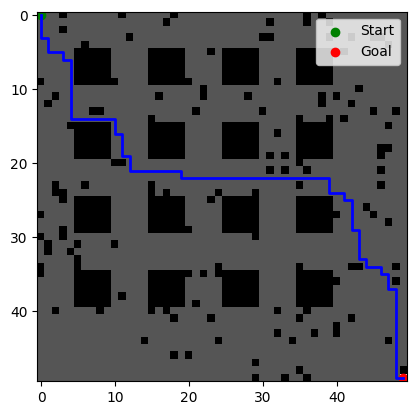

In [ ]:
import heapq
import numpy as np
import matplotlib.pyplot as plt

class Node:
    def __init__(self, position, parent=None, g=0, h=0):
        self.position = position
        self.parent = parent
        self.g = g  # start to curr
        self.h = h  # curr to goal
        self.f = g + h  # Total cost

    def __lt__(self, other):
        return self.f < other.f

def heuristic(position, goal, heuristic_type="manhattan"):
    x1, y1 = position
    x2, y2 = goal
    if heuristic_type == "manhattan":
        return abs(x1 - x2) + abs(y1 - y2)
    elif heuristic_type == "euclidean":
        return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

def get_neighbors(node, grid_size, grid):
    x, y = node.position
    neighbors = []
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        nx, ny = x + dx, y + dy
        if 0 <= nx < grid_size and 0 <= ny < grid_size and grid[nx, ny] != 1:  # Check if within bounds and not an obstacle
            neighbors.append((nx, ny))
    return neighbors

def a_star(start, goal, grid_size, grid, heuristic_type="manhattan"):
    open_list = []
    closed_set = set()
    explored_nodes = []

    start_node = Node(start, g=0, h=heuristic(start, goal, heuristic_type))
    heapq.heappush(open_list, start_node)

    while open_list:
        current_node = heapq.heappop(open_list)

        if current_node.position == goal:
            path = []
            while current_node:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1], len(closed_set), explored_nodes  # Path, explored nodes

        closed_set.add(current_node.position)
        explored_nodes.append(current_node.position)

        for neighbor_pos in get_neighbors(current_node, grid_size, grid):
            if neighbor_pos in closed_set:
                continue

            g_cost = current_node.g + 1
            h_cost = heuristic(neighbor_pos, goal, heuristic_type)
            neighbor_node = Node(neighbor_pos, parent=current_node, g=g_cost, h=h_cost)

            if all(neighbor_node.position != open_node.position or neighbor_node.f < open_node.f for open_node in open_list):
                heapq.heappush(open_list, neighbor_node)

    return None, len(closed_set), explored_nodes  # No path found

def plot_grid(grid, start, goal, path=None):
    plt.imshow(grid, cmap="gray_r")
    plt.scatter(*start[::-1], color="green", label="Start")
    plt.scatter(*goal[::-1], color="red", label="Goal")

    if path:
        path = np.array(path)
        plt.plot(path[:, 1], path[:, 0], color="blue", linewidth=2)

    plt.legend()
    plt.show()

# Define parameters
grid_size = 50  # Modify the grid size
grid = np.zeros((grid_size, grid_size))

# Create obstacles in the grid
building_size = 5
for i in range(5, grid_size - 5, building_size + 5):
    for j in range(5, grid_size - 5, building_size + 5):
        grid[i:i+building_size, j:j+building_size] = 1

# Additional random obstacles
np.random.seed(0)
for _ in range(150):
    x, y = np.random.randint(0, grid_size, size=2)
    grid[x, y] = 1

# Define start and goal positions
start_position = (0, 0)
goal_position = (grid_size - 1, grid_size - 1)
grid[start_position] = -1  # Mark start
grid[goal_position] = -2  # Mark goal

# Run A* algorithm
path, explored_nodes, explored_positions = a_star(start_position, goal_position, grid_size, grid, heuristic_type="manhattan")

print("Path found:", path)
print("Total nodes explored:", explored_nodes)

# Visualize the search
plot_grid(grid, start_position, goal_position, path)


Greedy Algorithm

Greedy Best-First Search Path: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (8, 1), (9, 1), (10, 1), (10, 2), (10, 3), (11, 3), (12, 3), (13, 3), (14, 3), (15, 3), (16, 3), (17, 3), (18, 3), (19, 3), (20, 3), (21, 3), (22, 3), (23, 3), (23, 4), (24, 4), (25, 4), (26, 4), (27, 4), (28, 4), (29, 4), (30, 4), (30, 5), (30, 6), (31, 6), (32, 6), (33, 6), (34, 6), (34, 7), (34, 8), (34, 9), (34, 10), (35, 10), (36, 10), (37, 10), (38, 10), (39, 10), (40, 10), (41, 10), (42, 10), (43, 10), (44, 10), (45, 10), (46, 10), (47, 10), (48, 10), (49, 10), (49, 11), (49, 12), (49, 13), (49, 14), (49, 15), (49, 16), (49, 17), (49, 18), (49, 19), (49, 20), (49, 21), (49, 22), (49, 23), (49, 24), (49, 25), (49, 26), (49, 27), (49, 28), (48, 28), (48, 29), (48, 30), (49, 30), (49, 31), (49, 32), (48, 32), (48, 33), (48, 34), (47, 34), (47, 35), (47, 36), (48, 36), (48, 37), (49, 37), (49, 38), (49, 39), (49, 40), (49, 41), (49, 42), (49, 43), (49, 44), (49, 45), (49, 46), (49

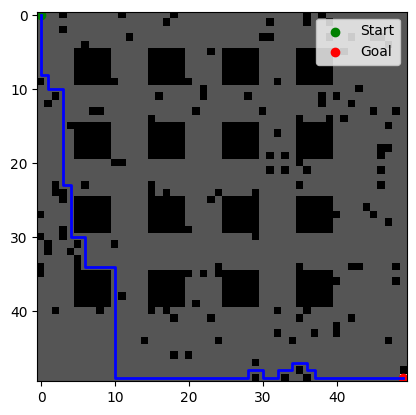

In [ ]:
import heapq
import numpy as np
import matplotlib.pyplot as plt

class Node:
    def __init__(self, position, parent=None, h=0):
        self.position = position
        self.parent = parent
        self.h = h  # Heuristic cost

    def __lt__(self, other):
        return self.h < other.h  # compare nodes by heuristic value

# Calculating heuristic function
def heuristic(position, goal, heuristic_type="manhattan"):
    x1, y1 = position
    x2, y2 = goal
    if heuristic_type == "manhattan":
        return abs(x1 - x2) + abs(y1 - y2)
    elif heuristic_type == "euclidean":
        return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5


def get_neighbors(node, grid_size, grid):
    x, y = node.position
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Possible moves: up, down, left, right
    return [
        (x + dx, y + dy)
        for dx, dy in directions
        if 0 <= x + dx < grid_size and 0 <= y + dy < grid_size and grid[x + dx, y + dy] != 1  # ensures the neighbour is not an obstacle as obstacles are marked as 1 and free space 0
    ]



def greedy_best_first_search(start, goal, grid_size, grid, heuristic_type="manhattan"):
    open_list = []   # priority queue for nodes to explore sorted by heuristic value
    closed_set = set() # set of nodes that have been already visited
    explored_nodes = [] # order which nodes are explored

    # initialize the start node
    start_node = Node(start, h=heuristic(start, goal, heuristic_type))
    heapq.heappush(open_list, start_node)  # adds start node to open list

    while open_list:
        current_node = heapq.heappop(open_list)  # pops the node with the smallest h from the open list

        # if goal is reached, reconstruct the path
        if current_node.position == goal:
            path = []
            while current_node:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1], len(closed_set), explored_nodes # return total explored nodes and the list of the nodes explored

        closed_set.add(current_node.position) # adds the node to the explored set to avoid revisiting it
        explored_nodes.append(current_node.position)

        # iterates through all valid neighbouring positions
        for neighbor_pos in get_neighbors(current_node, grid_size, grid):
            if neighbor_pos in closed_set:
                continue

            # compute heuristic cost for the neighbor
            h_cost = heuristic(neighbor_pos, goal, heuristic_type)
            neighbor_node = Node(neighbor_pos, parent=current_node, h=h_cost)

            # add valid neighbours to open list if they aren't already in it
            heapq.heappush(open_list, neighbor_node)

    return None, len(closed_set), explored_nodes  # No path found


def plot_grid(grid, start, goal, path=None):
    plt.imshow(grid, cmap="gray_r") # display grid a 2D image
    plt.scatter(*start[::-1], color="green", label="Start")
    plt.scatter(*goal[::-1], color="red", label="Goal")

    if path:
        path = np.array(path)
        plt.plot(path[:, 1], path[:, 0], color="blue", linewidth=2)

    plt.legend()
    plt.show()

# Define parameters
grid_size = 50  # Modify the grid size
grid = np.zeros((grid_size, grid_size))

# Create obstacles in the grid
building_size = 5
for i in range(5, grid_size - 5, building_size + 5):
    for j in range(5, grid_size - 5, building_size + 5):
        grid[i:i+building_size, j:j+building_size] = 1

# Additional random obstacles
np.random.seed(0)
for _ in range(150):
    x, y = np.random.randint(0, grid_size, size=2)
    grid[x, y] = 1

# Define start and goal positions
start_position = (0, 0)
goal_position = (grid_size - 1, grid_size - 1)
grid[start_position] = -1  # Mark start
grid[goal_position] = -2  # Mark goal

# printing the total explored nodes and the path for the Greedy algorithm
path, explored_nodes, explored_positions = greedy_best_first_search(
    start_position, goal_position, grid_size, grid, heuristic_type="manhattan"
)

print("Greedy Best-First Search Path:", path)
print("Total nodes explored in Greedy Best-First Search:", explored_nodes)

# visualizing the greedy algorithm
plot_grid(grid, start_position, goal_position, path)



# **The Graph Plot**

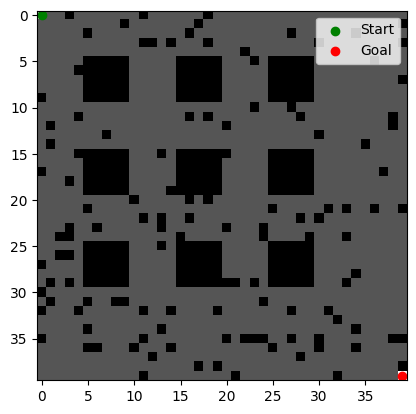

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

grid_size = 40
grid = np.zeros((grid_size, grid_size))

building_size = 5
for i in range(5, grid_size - 5, building_size + 5):
    for j in range(5, grid_size - 5, building_size + 5):
        grid[i:i+building_size, j:j+building_size] = 1

# Additional random obstacles for minor roadblocks
np.random.seed(0)
for _ in range(150):
    x, y = np.random.randint(0, grid_size, size=2)
    grid[x, y] = 1

start = (0, 0)
goal = (grid_size - 1, grid_size - 1)
grid[start] = -1
grid[goal] = -2

def plot_grid(grid, path=None):
    plt.imshow(grid, cmap="gray_r")
    plt.scatter(*start[::-1], color="green", label="Start")
    plt.scatter(*goal[::-1], color="red", label="Goal")

    if path:
        path = np.array(path)
        plt.plot(path[:, 1], path[:, 0], color="blue", linewidth=2)

    plt.legend()
    plt.show()

plot_grid(grid)

# **UCS**

In [ ]:
from queue import PriorityQueue

def ucs(grid, start, goal):
    rows, cols = len(grid), len(grid[0])
    visited = set()
    pq = PriorityQueue()
    pq.put((0, start))  # Priority queue with cost and position
    parent_map = {start: None}

    while not pq.empty():
        cost, node = pq.get()
        if node == goal:
            path = []
            while node:
                path.append(node)
                node = parent_map[node]
            return path[::-1]  # Reverse the path

        if node not in visited:
            visited.add(node)
            x, y = node
            directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                if 0 <= nx < rows and 0 <= ny < cols and grid[nx, ny] != 1 and (nx, ny) not in visited:
                    pq.put((cost + 1, (nx, ny)))  # Add 1 cost for each move
                    parent_map[(nx, ny)] = node
    return None

# **IDS**

In [ ]:
def ids(grid, start, goal, max_depth):
    def dfs(node, depth, visited, path):
        if depth > max_depth:
            return None  # Stop if depth exceeds max depth
        x, y = node
        if node == goal:
            return path
        visited.add(node)
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < len(grid) and 0 <= ny < len(grid[0]) and grid[nx, ny] != 1 and (nx, ny) not in visited:
                result = dfs((nx, ny), depth + 1, visited, path + [(nx, ny)])
                if result is not None:
                    return result
        return None

    for depth in range(1, max_depth + 1):
        visited = set()
        path = dfs(start, 0, visited, [start])
        if path is not None:
            return path
    return None


# Hill climbing

In [ ]:
import numpy as np

class Node:
    def __init__(self, state, parent=None):
        self.state = state
        self.parent = parent

    def path(self):
        # Trace back to the start node
        path = []
        current = self
        while current:
            path.append(current.state)
            current = current.parent
        return path[::-1]  # Reverse to get path from start to goal


class Vehicle:
    def __init__(self, grid, start, goal):
        self.grid = grid
        self.start = start
        self.goal = goal

    def actions(self, state):
        # Possible moves: Up, Down, Left, Right
        x, y = state
        moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        return [
            (dx, dy) for dx, dy in moves
            if 0 <= x + dx < self.grid.shape[0]
            and 0 <= y + dy < self.grid.shape[1]
            and self.grid[x + dx, y + dy] == 0
        ]

    def result(self, state, action):
        x, y = state
        dx, dy = action
        return x + dx, y + dy

    def goal_test(self, state):
        return state == self.goal

    def heuristic(self, state):
        # Manhattan distance to the goal
        gx, gy = self.goal
        sx, sy = state
        return abs(gx - sx) + abs(gy - sy)


Hill Climbing Path: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (8, 1), (9, 1), (10, 1), (11, 1)]
Total nodes explored in Hill Climbing: 13


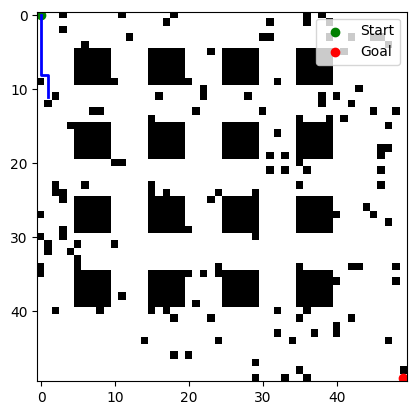

In [ ]:

def hill_climbing(problem):
    """Hill Climbing search algorithm."""
    current = Node(problem.start)
    while True:
        # Generate all neighbors
        neighbors = [
            Node(problem.result(current.state, action), current)
            for action in problem.actions(current.state)
        ]
        # If no neighbors are available, stop
        if not neighbors:
            break
        # Select the neighbor with the lowest heuristic value
        next_node = min(neighbors, key=lambda node: problem.heuristic(node.state))
        # If no improvement is found, stop
        if problem.heuristic(next_node.state) >= problem.heuristic(current.state):
            break
        # Move to the better neighbor
        current = next_node
    return current


def plot_grid(grid, start, goal, path=None):
    plt.imshow(grid, cmap="gray_r")
    plt.scatter(*start[::-1], color="green", label="Start")
    plt.scatter(*goal[::-1], color="red", label="Goal")
    if path:
        path = np.array(path)
        plt.plot(path[:, 1], path[:, 0], color="blue", linewidth=2)
    plt.legend()
    plt.show()


# grid Setup
grid_size = 50
grid = np.zeros((grid_size, grid_size))

# Add obstacles to the grid
building_size = 5
for i in range(5, grid_size - 5, building_size + 5):
    for j in range(5, grid_size - 5, building_size + 5):
        grid[i:i + building_size, j:j + building_size] = 1

# add random obstacles
np.random.seed(0)
for _ in range(150):
    x, y = np.random.randint(0, grid_size, size=2)
    grid[x, y] = 1

# define start and goal positions
start_position = (0, 0)
goal_position = (grid_size - 1, grid_size - 1)

# create the problem instance
problem = Vehicle(grid, start_position, goal_position)

# solve using hill climbing
final_node = hill_climbing(problem)

# retrieve the path from the final node
path = final_node.path()

# print results
print("Hill Climbing Path:", path)
print("Total nodes explored in Hill Climbing:", len(path))

# visualize results
plot_grid(grid, start_position, goal_position, path=path)



# **Simulated Annealing**

In [ ]:
import random
import math

def simulated_annealing(grid, start, goal, initial_temp=1000, cooling_rate=0.995, max_iterations=10000):
    current_path = [start]
    current_cost = len(current_path)
    best_path = current_path[:]
    best_cost = current_cost
    temperature = initial_temp

    for iteration in range(max_iterations):
        # Generate a neighboring path by slightly modifying the current path
        neighbors = [neighbor for neighbor in get_neighbors(grid, current_path[-1]) if neighbor not in current_path]
        if not neighbors:
            continue
        next_step = random.choice(neighbors)
        new_path = current_path + [next_step]
        new_cost = len(new_path)

        # Acceptance formula
        if new_cost < current_cost or random.random() < math.exp(-(new_cost - current_cost) / temperature):
            current_path = new_path
            current_cost = new_cost

            # Update the best path
            if current_cost < best_cost:
                best_path = current_path
                best_cost = current_cost

        temperature *= cooling_rate

        # Stop if goal is reached
        if current_path[-1] == goal:
            break

    return best_path if best_path[-1] == goal else None

def get_neighbors(grid, cell):
    x, y = cell
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    return [(x + dx, y + dy) for dx, dy in directions if 0 <= x + dx < grid_size and 0 <= y + dy < grid_size and grid[x + dx, y + dy] != 1]

# **BFS**

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (8, 1), (9, 1), (10, 1), (11, 1), (11, 2), (12, 2), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 2), (20, 2), (21, 2), (22, 2), (22, 3), (22, 4), (23, 4), (24, 4), (25, 4), (26, 4), (27, 4), (28, 4), (29, 4), (30, 4), (30, 5), (30, 6), (31, 6), (32, 6), (33, 6), (34, 6), (34, 7), (34, 8), (34, 9), (34, 10), (34, 11), (34, 12), (35, 12), (36, 12), (36, 13), (37, 13), (37, 14), (37, 15), (37, 16), (37, 17), (37, 18), (37, 19), (37, 20), (38, 20), (38, 21), (38, 22), (38, 23), (38, 24), (38, 25), (38, 26), (38, 27), (38, 28), (38, 29), (38, 30), (38, 31), (38, 32), (38, 33), (39, 33), (39, 34), (39, 35), (39, 36), (39, 37), (39, 38), (39, 39)]


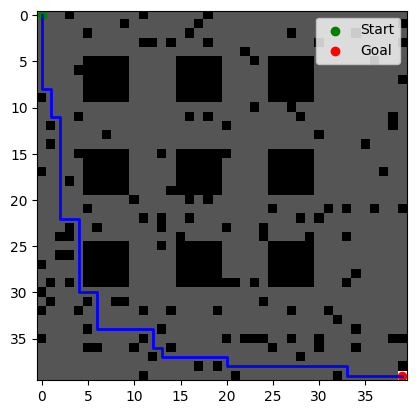

In [ ]:
import collections

def BFS(grid, start, goal):
  queue = collections.deque([(start, [start])])
  visited = []
  visited.append(start)

  while queue:
      (x, y), path = queue.popleft()
      if (x,y) == goal:
          return path

      neighbors = [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]
      for n in neighbors:
          if n[0] < 0 or n[0] >= grid_size or n[1] < 0 or n[1] >= grid_size:
              continue
          if grid[n] == 1 or n in visited:
              continue
          queue.append((n, path + [n]))
          visited.append(n)

path = BFS(grid, start, goal)
print(path)
plot_grid(grid, path)

# **DFS**

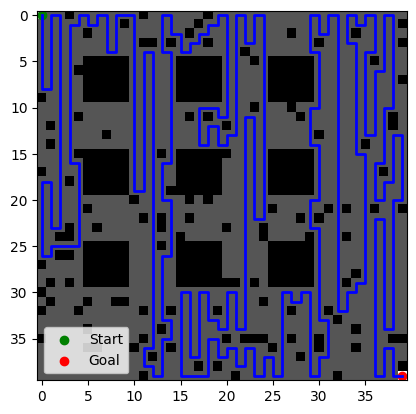

In [ ]:
def DFS(grid, start, goal):
    stack = [(start, [start])]
    visited = set()

    while stack:
        (x, y), path = stack.pop()
        visited.add((x, y))

        if (x, y) == goal:
            return path

        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            nx, ny = x + dx, y + dy

            if (0 <= nx < grid_size and 0 <= ny < grid_size and
                    grid[nx, ny] != 1 and (nx, ny) not in visited):
                stack.append(((nx, ny), path + [(nx, ny)]))


plot_grid(grid ,DFS(grid, start, goal))

# **Main Menu**

In [ ]:
def main_menu():
    while True:
        print("Select the algorithm to use: ")
        print("1. UCS (Uniform Cost Search)")
        print("2. IDS (Iterative Deepening Search)")
        print("3. Simulated Annealing")
        print("4. DFS")
        print("5. BFS")
        print("6. Exit")
        choice = input("Enter the number of your choice: ")

        if choice == "1":
            print("Running UCS...")
            path = ucs(grid, start, goal)
            if path:
                print("Path found using UCS!")
                plot_grid(grid, path)
            else:
                print("No path found using UCS.")

        elif choice == "2":
            print("Running IDS...")
            path = ids(grid, start, goal, max_depth=100)
            if path:
                print("Path found using IDS!")
                plot_grid(grid, path)
            else:
                print("No path found using IDS.")

        elif choice == "3":
            print("Running Simulated Annealing...")
            path = simulated_annealing(grid, start, goal)
            if path:
                print("Path found using Simulated Annealing!")
                plot_grid(grid, path)
            else:
                print("No path found using Simulated Annealing.")

        elif choice == "4":
            print("Running DFS...")
            path = DFS(grid, start, goal)
            if path:
                print("Path found using DFS!")
                plot_grid(grid, path)
            else:
                print("No path found using DFS.")

        elif choice == "5":
            print("Running BFS...")
            path = BFS(grid, start, goal)
            if path:
                print("Path found using BFS!")
                plot_grid(grid, path)
            else:
                print("No path found using BFS.")

        elif choice == "6":
            print("Exiting...")
            break
        else:
            print("Invalid choice. Please enter 1, 2, 3, 4, 5 or 6.")

main_menu()

Select the algorithm to use: 
1. UCS (Uniform Cost Search)
2. IDS (Iterative Deepening Search)
3. Simulated Annealing
4. DFS
5. BFS
6. Exit
